### 133. Clone Graph

#### Content
<p>Given a reference of a node in a <strong><a href="https://en.wikipedia.org/wiki/Connectivity_(graph_theory)#Connected_graph" target="_blank">connected</a></strong> undirected graph.</p>

<p>Return a <a href="https://en.wikipedia.org/wiki/Object_copying#Deep_copy" target="_blank"><strong>deep copy</strong></a> (clone) of the graph.</p>

<p>Each node in the graph contains a value (<code>int</code>) and a list (<code>List[Node]</code>) of its neighbors.</p>

<pre>
class Node {
    public int val;
    public List&lt;Node&gt; neighbors;
}
</pre>

<p>&nbsp;</p>

<p><strong>Test case format:</strong></p>

<p>For simplicity, each node&#39;s value is the same as the node&#39;s index (1-indexed). For example, the first node with <code>val == 1</code>, the second node with <code>val == 2</code>, and so on. The graph is represented in the test case using an adjacency list.</p>

<p><b>An adjacency list</b> is a collection of unordered <b>lists</b> used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.</p>

<p>The given node will always be the first node with <code>val = 1</code>. You must return the <strong>copy of the given node</strong> as a reference to the cloned graph.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2019/11/04/133_clone_graph_question.png" style="width: 454px; height: 500px;" />
<pre>
<strong>Input:</strong> adjList = [[2,4],[1,3],[2,4],[1,3]]
<strong>Output:</strong> [[2,4],[1,3],[2,4],[1,3]]
<strong>Explanation:</strong> There are 4 nodes in the graph.
1st node (val = 1)&#39;s neighbors are 2nd node (val = 2) and 4th node (val = 4).
2nd node (val = 2)&#39;s neighbors are 1st node (val = 1) and 3rd node (val = 3).
3rd node (val = 3)&#39;s neighbors are 2nd node (val = 2) and 4th node (val = 4).
4th node (val = 4)&#39;s neighbors are 1st node (val = 1) and 3rd node (val = 3).
</pre>

<p><strong>Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/01/07/graph.png" style="width: 163px; height: 148px;" />
<pre>
<strong>Input:</strong> adjList = [[]]
<strong>Output:</strong> [[]]
<strong>Explanation:</strong> Note that the input contains one empty list. The graph consists of only one node with val = 1 and it does not have any neighbors.
</pre>

<p><strong>Example 3:</strong></p>

<pre>
<strong>Input:</strong> adjList = []
<strong>Output:</strong> []
<strong>Explanation:</strong> This an empty graph, it does not have any nodes.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the graph is in the range <code>[0, 100]</code>.</li>
	<li><code>1 &lt;= Node.val &lt;= 100</code></li>
	<li><code>Node.val</code> is unique for each node.</li>
	<li>There are no repeated edges and no self-loops in the graph.</li>
	<li>The Graph is connected and all nodes can be visited starting from the given node.</li>
</ul>


#### Difficulty: Medium, AC rate: 46.6%

#### Question Tags:
- Hash Table
- Depth-First Search
- Breadth-First Search
- Graph

#### Links:
 🎁 [Question Detail](https://leetcode.com/problems/clone-graph/description/) | 🎉 [Question Solution](https://leetcode.com/problems/clone-graph/solution/) | 💬 [Question Discussion](https://leetcode.com/problems/clone-graph/discuss/?orderBy=most_votes)

#### Hints:


#### Sample Test Case
[[2,4],[1,3],[2,4],[1,3]]

---
What's your idea?

BFS

---

In [1]:
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

In [2]:
class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if node is None:
            return None
        level = [node]
        visited = {}
        
        while any(n.val not in visited for n in level):
            next_level = []
            for n in level:
                if n.val not in visited:
                    visited[n.val] = (n, Node(n.val))
                next_level += n.neighbors
            level = next_level
        
        for origin, copy in visited.values():
            copy.neighbors = [visited[n.val][1] for n in origin.neighbors]
        return visited[node.val][1]

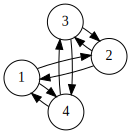

In [3]:
from visualizer import visualize_directed_graph
s = Solution()

n1 = Node(1)
clone = s.cloneGraph(n1)
assert clone.val == n1.val
assert clone.neighbors == []

clone = s.cloneGraph(None)
assert clone is None

n1, n2, n3, n4 = Node(1), Node(2), Node(3), Node(4)
n1.neighbors, n2.neighbors, n3.neighbors, n4.neighbors = [n2, n4], [n1, n3], [n2, n4], [n1, n3]
clone = s.cloneGraph(n1)
visualize_directed_graph(clone)
assert clone.val == n1.val
assert [n.val for n in clone.neighbors] == [2, 4]
assert id(clone) != id(n1)
clone_n2 = clone.neighbors[0]
assert id(clone_n2) != id(n2)
assert clone_n2.val == n2.val
assert [n.val for n in clone_n2.neighbors] == [1, 3]
clone_n3 = clone_n2.neighbors[1]
assert id(clone_n3) != id(n3)
assert clone_n3.val == n3.val
assert [n.val for n in clone_n3.neighbors] == [2, 4]
clone_n4 = clone.neighbors[1]
assert id(clone_n4) != id(n4)
assert clone_n4.val == n4.val
assert [n.val for n in clone_n4.neighbors] == [1, 3]

In [6]:
import sys, os; sys.path.append(os.path.abspath('..'))
from submitter import submit
submit(133)

😃 Result: Accepted

📥 Input: ``

📤 Output: ``

✅ Expected: ``

💯 Passed Test Case: 22 / 22

🚀 Runtime: 79 ms, Memory: 16.7 MB

🉑 Runtime Percentile: better than 7.94%, Memory Percentile: better than 10.15%

📆 Finished At: 2022-02-27